In [1]:
import pandas as pd

df = pd.read_csv("games.csv")

print(df.shape)
df.head()


(71716, 39)


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [2]:
df = df[[
    "AppID",
    "Name",
    "About the game",
    "Genres"
]]


In [3]:
df = df.rename(columns={
    "AppID": "appid",
    "Name": "name",
    "About the game": "about",
    "Genres": "genres"
})


In [4]:
df = df.dropna(subset=["about", "genres"])


In [5]:
import re

def clean_text(text):
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["about"] = df["about"].apply(clean_text)


In [6]:
df["text"] = df["about"] + " Genres: " + df["genres"]


In [7]:
import os

def has_image(appid):
    return os.path.exists(f"images/{appid}.jpg")

df["has_image"] = df["appid"].apply(has_image)

df = df[df["has_image"] == True]
df = df.drop(columns=["has_image"])

print("After image filtering:", df.shape)


After image filtering: (9736, 5)


In [8]:
df_stage1 = df.iloc[:3000].reset_index(drop=True)

print(df_stage1.shape)


(3000, 5)


In [9]:
df_stage1.to_csv("games_stage1.csv", index=False)


In [10]:
import pandas as pd

df = pd.read_csv("games_stage1.csv")

print(df.shape)
df.head()


(3000, 5)


,appid,name,about,genres,text
0,20200,Galactic Bowling,Galactic Bowling is an exaggerated and stylize...,"Casual,Indie,Sports",Galactic Bowling is an exaggerated and stylize...
1,655370,Train Bandit,THE LAW!! Looks to be a showdown atop a train....,"Action,Indie",THE LAW!! Looks to be a showdown atop a train....
2,1732930,Jolt Project,Jolt Project: The army now has a new robotics ...,"Action,Adventure,Indie,Strategy",Jolt Project: The army now has a new robotics ...
3,1355720,Henosis™,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"Adventure,Casual,Indie",HENOSIS™ is a mysterious 2D Platform Puzzler w...
4,1139950,Two Weeks in Painland,ABOUT THE GAME Play as a hacker who has arrang...,"Adventure,Indie",ABOUT THE GAME Play as a hacker who has arrang...


In [11]:
import tensorflow as tf

BATCH_SIZE = 16
IMG_SIZE = (224, 224)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.1


In [12]:
def load_image(appid):
    path = tf.strings.join(["images/", tf.strings.as_string(appid), ".jpg"])
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    return img


In [13]:
image_ds = tf.data.Dataset.from_tensor_slices(df["appid"].values)
image_ds = image_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)


In [14]:
for img in image_ds.take(1):
    print(img.shape)


(224, 224, 3)


In [15]:
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
)


In [17]:
BATCH_SIZE = 16

text_ds = tf.data.Dataset.from_tensor_slices(
    df["text"].astype(str).values
)

text_ds = text_ds.batch(BATCH_SIZE)

text_ds = text_ds.map(
    lambda x: bert_preprocess(x),
    num_parallel_calls=tf.data.AUTOTUNE
)


In [18]:
for batch in text_ds.take(1):
    for key, val in batch.items():
        print(key, val.shape)


input_type_ids (16, 128)
input_word_ids (16, 128)
input_mask (16, 128)


In [19]:
combined_ds = tf.data.Dataset.zip((text_ds, image_ds))
combined_ds = combined_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [20]:
for (text_batch, image_batch) in combined_ds.take(1):
    print("Image batch:", image_batch.shape)
    for k in text_batch:
        print(k, text_batch[k].shape)


Image batch: (16, 224, 224, 3)
input_type_ids (16, 16, 128)
input_word_ids (16, 16, 128)
input_mask (16, 16, 128)


In [21]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

image_base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    pooling="avg"   # IMPORTANT
)

image_base_model.trainable = False

print("ResNet output shape:", image_base_model.output_shape)


ResNet output shape: (None, 2048)


In [22]:
image_input = tf.keras.Input(shape=(224, 224, 3))
image_features = image_base_model(image_input)
image_features = tf.keras.layers.Dense(512, activation="relu")(image_features)

image_encoder = tf.keras.Model(image_input, image_features)


In [23]:
import tensorflow_hub as hub
import tensorflow_text as text

bert_encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2",
    trainable=False
)


In [24]:
text_input = tf.keras.Input(shape=(), dtype=tf.string)
text_preprocessed = bert_preprocess(text_input)
text_outputs = bert_encoder(text_preprocessed)

text_features = text_outputs["pooled_output"]
text_features = tf.keras.layers.Dense(512, activation="relu")(text_features)

text_encoder = tf.keras.Model(text_input, text_features)


In [25]:
import numpy as np

image_embeddings = []

for batch in image_ds.batch(16):
    emb = image_encoder(batch, training=False)
    image_embeddings.append(emb.numpy())

image_embeddings = np.vstack(image_embeddings)

print("Image embeddings shape:", image_embeddings.shape)


Image embeddings shape: (3000, 512)


In [26]:
text_embeddings = []

for batch in tf.data.Dataset.from_tensor_slices(df["text"].values).batch(16):
    emb = text_encoder(batch, training=False)
    text_embeddings.append(emb.numpy())

text_embeddings = np.vstack(text_embeddings)

print("Text embeddings shape:", text_embeddings.shape)


Text embeddings shape: (3000, 512)


In [27]:
multimodal_embeddings = np.concatenate(
    [text_embeddings, image_embeddings],
    axis=1
)

print("Multimodal embeddings shape:", multimodal_embeddings.shape)


Multimodal embeddings shape: (3000, 1024)


In [28]:
fusion_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256)
])

multimodal_embeddings = fusion_layer(multimodal_embeddings).numpy()

print("Final embedding shape:", multimodal_embeddings.shape)


Final embedding shape: (3000, 256)


In [29]:
np.save("game_embeddings_stage1.npy", multimodal_embeddings)
np.save("game_appids_stage1.npy", df["appid"].values)


In [30]:
# Load embeddings
embeddings = np.load("game_embeddings_stage1.npy")
appids = np.load("game_appids_stage1.npy")

# Load metadata
df = pd.read_csv("games_stage1.csv")

print(embeddings.shape)
print(df.shape)


(3000, 256)
(3000, 5)


In [31]:
from sklearn.preprocessing import normalize

embeddings = normalize(embeddings)


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)
print(similarity_matrix.shape)


(3000, 3000)


In [ ]:
def recommend_games(game_name, top_k=5):##core logic for recommendation based on cosine similarity 
    # Case-insensitive partial match
    matches = df[df["name"].str.lower().str.contains(game_name.lower())]

    if matches.empty:
        return "Game not found"

    # Take first match
    idx = matches.index[0]

    scores = list(enumerate(similarity_matrix[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:top_k+1]

    recommendations = []
    for i, score in scores:
        recommendations.append({
            "name": df.iloc[i]["name"],
            "genres": df.iloc[i]["genres"],
            "similarity": round(float(score), 3)
        })

    return pd.DataFrame(recommendations)


In [39]:
recommend_games("Witcher", top_k=5)


,name,genres,similarity
0,Massive Cleavage vs Zombies: Awesome Edition,"Action,Casual,Indie",0.847
1,Hardpunch: Fuck 4Joy,"Action,Adventure,Strategy",0.846
2,Attractio,Action,0.846
3,Syberia 3,Adventure,0.840
4,SCUM,"Action,Adventure,Indie,Massively Multiplayer,E...",0.839


In [40]:
from IPython.display import Image, display

def show_recommendations(game_name):
    recs = recommend_games(game_name)
    if isinstance(recs, str):
        print(recs)
        return
    
    for _, row in recs.iterrows():
        print(row["name"], "| Similarity:", row["similarity"])
        display(Image(filename=f"images/{df[df['name']==row['name']]['appid'].values[0]}.jpg"))


Massive Cleavage vs Zombies: Awesome Edition | Similarity: 0.847


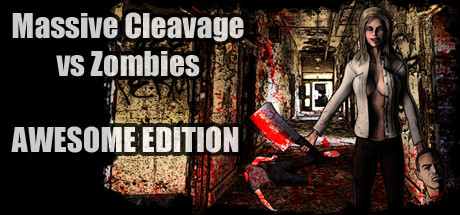

Hardpunch: Fuck 4Joy | Similarity: 0.846


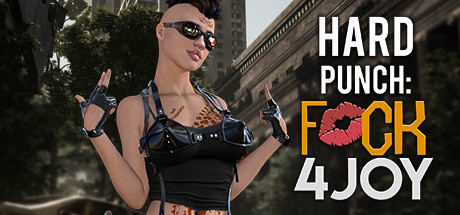

Attractio | Similarity: 0.846


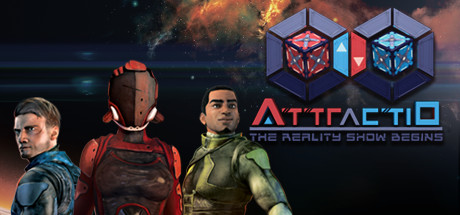

Syberia 3 | Similarity: 0.84


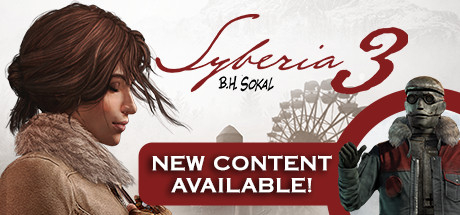

SCUM | Similarity: 0.839


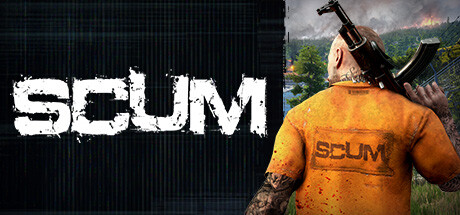

In [42]:
show_recommendations("witcher")
